In [1]:
import cv2 as cv
import numpy as np

LOADING DATASETS

In [2]:
import deeplake

C:\Users\kashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.9.25) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [3]:
data_train = deeplake.load('hub://activeloop/fer2013-train')

-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



|

hub://activeloop/fer2013-train loaded successfully.



In [4]:
print(data_train.info)

{'classes': '0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral', 'source': 'https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/', 'title': 'Challenges in Representation Learning: Facial Expression Recognition Challenge'}


In [5]:
data_test = deeplake.load('hub://activeloop/fer2013-public-test')

-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-public-test



-

hub://activeloop/fer2013-public-test loaded successfully.



In [6]:
data_valid = deeplake.load('hub://activeloop/fer2013-private-test')

|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-private-test



hub://activeloop/fer2013-private-test loaded successfully.



In [7]:
images=data_train['images']
labels=data_train['labels']

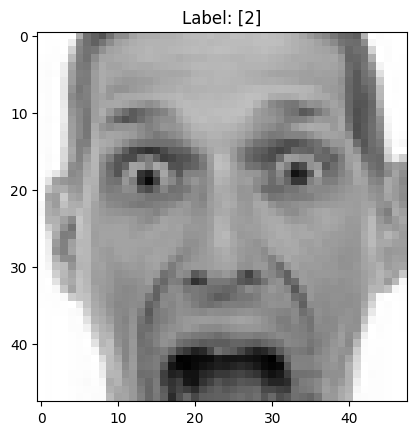

In [8]:
import matplotlib.pyplot as plt

plt.imshow(images[9].numpy(), cmap='gray')
plt.title(f'Label: {labels[9].numpy()}')
plt.show()

PREPROCESSING DATA

In [9]:
print(len(images))

28709


In [10]:
batch_size = 500 
images_list = []

for i in range(0, len(images), batch_size):
    batch = images[i:i + batch_size]
    batch_np = np.array([image.numpy() for image in batch])
    images_list.append(batch_np)
    print(i)

image = np.concatenate(images_list, axis=0)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500


In [11]:
label = np.array([label.numpy() for label in labels])

In [12]:
print(label[5])

[2]


In [13]:
print(image[1])

[[151 150 147 ... 129 140 120]
 [151 149 149 ... 122 141 137]
 [151 151 156 ... 109 123 146]
 ...
 [188 188 121 ... 185 185 186]
 [188 187 196 ... 186 182 187]
 [186 184 185 ... 193 183 184]]


In [14]:
#print(images[3].numpy())

image=image/255

print(image[1])

[[0.59215686 0.58823529 0.57647059 ... 0.50588235 0.54901961 0.47058824]
 [0.59215686 0.58431373 0.58431373 ... 0.47843137 0.55294118 0.5372549 ]
 [0.59215686 0.59215686 0.61176471 ... 0.42745098 0.48235294 0.57254902]
 ...
 [0.7372549  0.7372549  0.4745098  ... 0.7254902  0.7254902  0.72941176]
 [0.7372549  0.73333333 0.76862745 ... 0.72941176 0.71372549 0.73333333]
 [0.72941176 0.72156863 0.7254902  ... 0.75686275 0.71764706 0.72156863]]


DATA_SPLIT

In [15]:
x_test=np.array([image.numpy() for image in data_test['images'] ])
y_test=np.array([label.numpy() for label in data_test['labels'] ])

In [16]:
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_test:  (3589, 48, 48)
Shape of Y_test:  (3589, 1)


In [17]:
x_valid=np.array([image.numpy() for image in data_valid['images'] ])
y_valid=np.array([label.numpy() for label in data_valid['labels'] ])

MODEL BUILDING

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [19]:
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(7,activation='softmax'),
])


C:\Users\kashi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [22]:
model.fit(image,
          label,
          batch_size=32,
          epochs=5,
          validation_data=(x_valid,y_valid),
          callbacks=[early_stopping]
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3166 - loss: 1.7161 - val_accuracy: 0.3252 - val_loss: 187.9619
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4519 - loss: 1.4531 - val_accuracy: 0.2806 - val_loss: 199.8005
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4906 - loss: 1.3523 - val_accuracy: 0.3271 - val_loss: 220.2530
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5221 - loss: 1.2563 - val_accuracy: 0.3143 - val_loss: 315.0678


In [23]:
loss, accuracy= model.evaluate(x_test,y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 318.0109


PREDICTING

In [24]:
import random

In [25]:
emotion_labels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

#emotion_labels[0]

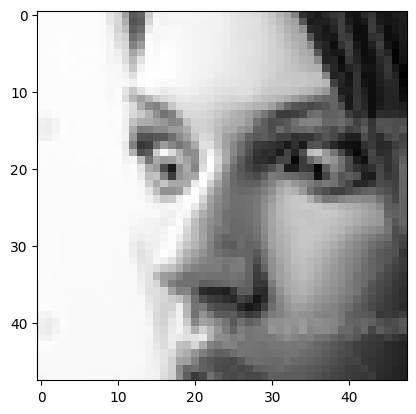

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Surprise


In [44]:
num = random.randint(0,len(y_test))
plt.imshow(x_test[num,:],cmap='gray')
plt.show()

y_pred=model.predict(x_test[num, :].reshape(1,48,48,1))
#print(y_pred)

y=np.array(y_pred[0])
"""print(y)
print(y[2])"""

for i in range(len(y)):
    if y[i]==1:
        print(emotion_labels[i])

LIVE RECOGNITION

In [27]:
#import cv2 as cv

In [28]:
"""video=cv.VideoCapture(0)
haar_cascade=cv.CascadeClassifier('haar_face.xml')"""

"video=cv.VideoCapture(0)\nhaar_cascade=cv.CascadeClassifier('haar_face.xml')"

In [29]:
model.save('my_model.h5')

In [30]:
"""while True:
    
    ret,frames=video.read()

    if not ret:
        break
    #cv.imshow('video',frames)

    grey=cv.cvtColor(frames,cv.COLOR_BGR2GRAY)
    resized=cv.resize(frames,(48,48))
    normalized= resized/255.0

    cv.imshow('grey',grey)

    reshaped_frame = np.expand_dims(normalized, axis=(0, -1))

    reshaped_frame.size()

    predictions= model.predict(reshaped_frame)
    pred_1 =np.array(predictions[0])

    for i in range(len(pred_1)):

        if pred_1[i]==1:
            emotion_label=emotion_labels[i]

    cv.putText(frames, emotion_label, (50, 50), cv.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0), 2, cv.LINE_AA)
    cv.imshow('Live Video', frames)

    if(cv.waitKey(1) & 0xFF==ord('d')):
        break

    faces_rect=haar_cascade.detectMultiScale(grey,scaleFactor=1.1,minNeighbors=3)
    print(len(faces_rect))

    for (x,y,w,h) in faces_rect:
        cv.rectangle(grey,(x,y),(x+w,y+h),(0,255,0),1)

    cv.imshow('grey',grey)

    if(cv.waitKey(20) & 0xFF==ord('d')):
        break

video.release()
cv.destroyAllWindows()

cv.waitKey(0)"""

"while True:\n    \n    ret,frames=video.read()\n\n    if not ret:\n        break\n    #cv.imshow('video',frames)\n\n    grey=cv.cvtColor(frames,cv.COLOR_BGR2GRAY)\n    resized=cv.resize(frames,(48,48))\n    normalized= resized/255.0\n\n    cv.imshow('grey',grey)\n\n    reshaped_frame = np.expand_dims(normalized, axis=(0, -1))\n\n    reshaped_frame.size()\n\n    predictions= model.predict(reshaped_frame)\n    pred_1 =np.array(predictions[0])\n\n    for i in range(len(pred_1)):\n\n        if pred_1[i]==1:\n            emotion_label=emotion_labels[i]\n\n    cv.putText(frames, emotion_label, (50, 50), cv.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0), 2, cv.LINE_AA)\n    cv.imshow('Live Video', frames)\n\n    if(cv.waitKey(1) & 0xFF==ord('d')):\n        break\n\n    faces_rect=haar_cascade.detectMultiScale(grey,scaleFactor=1.1,minNeighbors=3)\n    print(len(faces_rect))\n\n    for (x,y,w,h) in faces_rect:\n        cv.rectangle(grey,(x,y),(x+w,y+h),(0,255,0),1)\n\n    cv.imshow('grey',grey)\n\n    if